In [1]:
import os
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, Series

## Load multiple files into one dataframe

In [2]:
years = range(2005,2015)
columns_def = ['DEF Rk','Year','Team','Playoffs','Team2','Wins','Losses','G','MP','FG','FGA','FG%',
           '3P','3PA','3P%','2P','2PA','2P%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS','PTS/G']
def_nba = pd.DataFrame()
years

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

In [3]:
for year in years:
    path = 'work_data/DEF/%d_OppStats.csv' % year
    frame = pd.read_csv(path, names=columns_def, skiprows=[0,31])
    def_nba = def_nba.append(frame, ignore_index=True)

In [4]:
def_nba.describe()

,DEF Rk,Year,Wins,Losses,G,MP,FG,FGA,FG%,3P,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
count,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,15.500000,2009.50000,40.196667,40.196667,80.393333,19444.400000,2966.910000,6517.846667,0.455007,521.076667,...,899.053333,2455.213333,3354.266667,1719.176667,595.876667,388.450000,1161.050000,1701.670000,7948.773333,98.820333
std,8.669903,2.87708,12.610899,12.613286,4.806485,1163.028198,244.223598,454.395320,0.014886,82.873503,...,87.321938,192.759596,249.981101,181.282311,62.859253,60.143036,114.328083,188.373378,650.814557,4.681439
min,1.000000,2005.00000,7.000000,15.000000,66.000000,15840.000000,2207.000000,5098.000000,0.419000,300.000000,...,667.000000,1889.000000,2624.000000,1233.000000,391.000000,246.000000,745.000000,1070.000000,5819.000000,88.200000
25%,8.000000,2007.00000,31.750000,30.000000,82.000000,19755.000000,2868.500000,6395.250000,0.444000,460.750000,...,847.500000,2384.250000,3260.500000,1608.500000,559.750000,343.000000,1095.750000,1624.500000,7751.750000,95.575000
50%,15.500000,2009.50000,41.000000,40.000000,82.000000,19805.000000,3003.500000,6593.000000,0.456000,520.500000,...,900.000000,2475.500000,3384.500000,1731.500000,597.000000,388.500000,1165.500000,1717.500000,8073.000000,99.050000
75%,23.000000,2012.00000,50.000000,49.000000,82.000000,19880.000000,3126.000000,6805.000000,0.465250,573.500000,...,955.000000,2583.000000,3503.000000,1834.750000,637.250000,425.250000,1240.250000,1829.750000,8354.000000,102.000000
max,30.000000,2014.00000,67.000000,70.000000,82.000000,20055.000000,3440.000000,7485.000000,0.491000,765.000000,...,1233.000000,2950.000000,4018.000000,2144.000000,790.000000,565.000000,1525.000000,2104.000000,9217.000000,112.400000


In [5]:
def_nba.head()

,DEF Rk,Year,Team,Playoffs,Team2,Wins,Losses,G,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PTS/G
0,1,2005,San Antonio Spurs,Y,San Antonio Spurs*�(2),59,23,82,19805,2712,...,893,2403,3296,1385,594,421,1240,1891,7248,88.4
1,2,2005,Detroit Pistons,Y,Detroit Pistons*�(2),54,28,82,19955,2791,...,928,2321,3249,1618,610,367,1135,1851,7336,89.5
2,3,2005,Houston Rockets,Y,Houston Rockets*�(5),51,31,82,19855,2720,...,892,2444,3336,1696,607,335,1087,1773,7465,91.0
3,4,2005,Memphis Grizzlies,Y,Memphis Grizzlies*�(8),45,37,82,19705,2684,...,993,2387,3380,1633,612,476,1303,1853,7473,91.1
4,5,2005,Indiana Pacers,Y,Indiana Pacers*�(6),44,38,82,19905,2768,...,972,2416,3388,1540,549,398,1142,1883,7564,92.2


## Load Conference & Division data

In [6]:
nba_ConfDiv = pd.read_csv('work_data/TeamConfDiv.csv')
nba_ConfDiv.head()

,Team,Conference,Division
0,Toronto Raptors,Eastern Conference,Atlantic Division
1,Brooklyn Nets,Eastern Conference,Atlantic Division
2,New Jersey Nets,Eastern Conference,Atlantic Division
3,New York Knicks,Eastern Conference,Atlantic Division
4,Boston Celtics,Eastern Conference,Atlantic Division


## Merge Data

In [8]:
def_ConfDiv = pd.merge(def_nba, nba_ConfDiv, on='Team', how='outer')
def_ConfDiv.columns

Index([u'DEF Rk', u'Year', u'Team', u'Playoffs', u'Team2', u'Wins', u'Losses',
       u'G', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P',
       u'2PA', u'2P%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST',
       u'STL', u'BLK', u'TOV', u'PF', u'PTS', u'PTS/G', u'Conference',
       u'Division'],
      dtype='object')

In [9]:
def_ConfDiv[def_ConfDiv['Wins'] + def_ConfDiv['Losses'] < 82][['Team', 'Year', 'Wins', 'Losses']]

,Team,Year,Wins,Losses
7,San Antonio Spurs,2012,50,16
17,Detroit Pistons,2012,25,41
27,Houston Rockets,2012,34,32
37,Memphis Grizzlies,2012,41,25
47,Indiana Pacers,2012,42,24
48,Indiana Pacers,2013,49,32
57,New Jersey Nets,2012,22,44
65,Chicago Bulls,2012,50,16
75,Miami Heat,2012,46,20
85,Minnesota Timberwolves,2012,26,40


In [10]:
def_ConfDiv['Win%'] = def_ConfDiv['Wins']/(def_ConfDiv['Wins'] + def_ConfDiv['Losses'])
def_ConfDiv[['Team', 'Year', 'Wins', 'Losses', 'Win%']].head()

,Team,Year,Wins,Losses,Win%
0,San Antonio Spurs,2005,59,23,0.719512
1,San Antonio Spurs,2006,63,19,0.768293
2,San Antonio Spurs,2007,58,24,0.707317
3,San Antonio Spurs,2008,56,26,0.682927
4,San Antonio Spurs,2009,54,28,0.658537


In [11]:
def_ConfDiv.loc[def_ConfDiv['Win%'] > 0.5, 'Winning Record'] = 'Y'
def_ConfDiv[['Team','Winning Record']].head()

,Team,Winning Record
0,San Antonio Spurs,Y
1,San Antonio Spurs,Y
2,San Antonio Spurs,Y
3,San Antonio Spurs,Y
4,San Antonio Spurs,Y


## Groupby Year, Year & Conf, Year & Div

In [12]:
def_grouped = def_ConfDiv.groupby('Year')
def_grouped_year = def_grouped.mean()
def_grouped_year = def_grouped_year[['FG%', '2P%', '3P%']]
def_grouped_year.columns = ['FG% Year', '2P% Year', '3P% Year']
def_grouped_year.reset_index(level=0, inplace=True)
def_grouped_year

,Year,FG% Year,2P% Year,3P% Year
0,2005,0.447367,0.469967,0.355900
1,2006,0.453733,0.478167,0.357600
2,2007,0.458233,0.485267,0.357500
3,2008,0.457167,0.484433,0.361333
4,2009,0.458667,0.485267,0.366667
5,2010,0.461267,0.491867,0.354533
6,2011,0.458500,0.487100,0.358033
7,2012,0.447900,0.476900,0.348200
8,2013,0.452800,0.483033,0.358433
9,2014,0.454433,0.487867,0.359267


In [13]:
def_grouped2 = def_ConfDiv.groupby(['Year', 'Conference'])
def_grouped_conf = def_grouped2.mean()
def_grouped_conf = def_grouped_conf[['FG%', '2P%', '3P%']]
def_grouped_conf.columns = ['FG% Conf', '2P% Conf', '3P% Conf']
def_grouped_conf.reset_index(level=0, inplace=True)
def_grouped_conf.reset_index(level=0, inplace=True)
def_grouped_conf

,Conference,Year,FG% Conf,2P% Conf,3P% Conf
0,Eastern Conference,2005,0.449467,0.472200,0.357133
1,Western Conference,2005,0.445267,0.467733,0.354667
2,Eastern Conference,2006,0.457667,0.483467,0.355800
3,Western Conference,2006,0.449800,0.472867,0.359400
4,Eastern Conference,2007,0.457267,0.483533,0.358533
5,Western Conference,2007,0.459200,0.487000,0.356467
6,Eastern Conference,2008,0.456733,0.484400,0.363067
7,Western Conference,2008,0.457600,0.484467,0.359600
8,Eastern Conference,2009,0.455600,0.482867,0.363267
9,Western Conference,2009,0.461733,0.487667,0.370067


In [14]:
def_grouped3 = def_ConfDiv.groupby(['Year', 'Division'])
def_grouped_div = def_grouped3.mean()
def_grouped_div = def_grouped_div[['FG%', '2P%', '3P%']]
def_grouped_div.columns = ['FG% Div', '2P% Div', '3P% Div']
def_grouped_div.reset_index(level=0, inplace=True)
def_grouped_div.reset_index(level=0, inplace=True)
# not printed to save space

## More Merging

In [15]:
def_conf = pd.merge(def_ConfDiv, def_grouped_year, on='Year')
def_conf = pd.merge(def_conf, def_grouped_conf, on=['Year', 'Conference'])
def_conf = pd.merge(def_conf, def_grouped_div, on=['Year', 'Division'])
def_conf.columns, def_conf.shape

(Index([u'DEF Rk', u'Year', u'Team', u'Playoffs', u'Team2', u'Wins', u'Losses',
        u'G', u'MP', u'FG', u'FGA', u'FG%', u'3P', u'3PA', u'3P%', u'2P',
        u'2PA', u'2P%', u'FT', u'FTA', u'FT%', u'ORB', u'DRB', u'TRB', u'AST',
        u'STL', u'BLK', u'TOV', u'PF', u'PTS', u'PTS/G', u'Conference',
        u'Division', u'Win%', u'Winning Record', u'FG% Year', u'2P% Year',
        u'3P% Year', u'FG% Conf', u'2P% Conf', u'3P% Conf', u'FG% Div',
        u'2P% Div', u'3P% Div'],
       dtype='object'), (300, 44))

## Field-Goal Normalization / Create Index

In [16]:
def_conf['FG% IDX_Year'] = def_conf['FG%']/def_conf['FG% Year']
def_conf['FG% IDX_Conf'] = def_conf['FG%']/def_conf['FG% Conf']
def_conf['FG% IDX_Div'] = def_conf['FG%']/def_conf['FG% Div']
def_conf[['Year', 'Team', 'FG%', 'FG% IDX_Year', 'FG% IDX_Conf', 'FG% IDX_Div', 'Win%', 'Playoffs']].head()

,Year,Team,FG%,FG% IDX_Year,FG% IDX_Conf,FG% IDX_Div,Win%,Playoffs
0,2005,San Antonio Spurs,0.426,0.952239,0.956730,0.981115,0.719512,Y
1,2005,Houston Rockets,0.423,0.945533,0.949993,0.974205,0.621951,Y
2,2005,Memphis Grizzlies,0.432,0.965651,0.970205,0.994933,0.548780,Y
3,2005,New Orleans Hornets,0.452,1.010357,1.015122,1.040995,0.219512,NaN
4,2005,Dallas Mavericks,0.438,0.979063,0.983680,1.008752,0.707317,Y


## Plotting

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

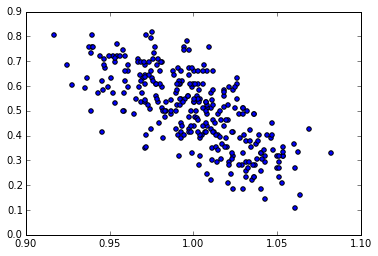

In [19]:
plt.scatter(def_conf['FG% IDX_Year'], def_conf['Win%'])
# shows a negative correlation (to be expected) between FG% (Indexed) allowed and Win%
# will create a scatter plot for each, and fit a line:
    # 'FG% IDX_Year' & 'Win%'
    # 'FG% IDX_Conf' & 'Win%'
    # 'FG% IDX_Div' & 'Win%'

'm: -3.50021760916; b: 4.00022212587'

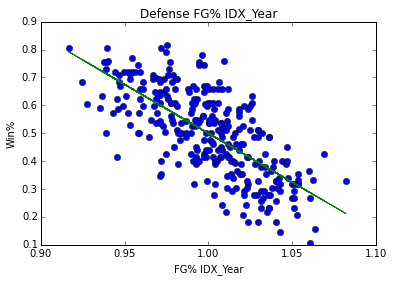

In [21]:
m, b = np.polyfit(def_conf['FG% IDX_Year'], def_conf['Win%'], 1)

plt.plot(def_conf['FG% IDX_Year'], def_conf['Win%'], 'o')
plt.plot(def_conf['FG% IDX_Year'], m * def_conf['FG% IDX_Year'] + b, '-')
plt.title('Defense FG% IDX_Year')
plt.xlabel('FG% IDX_Year')
plt.ylabel('Win%')

'm: ' + str(m) + '; b: ' + str(b)

'm: -3.59470163653; b: 4.09470615324'

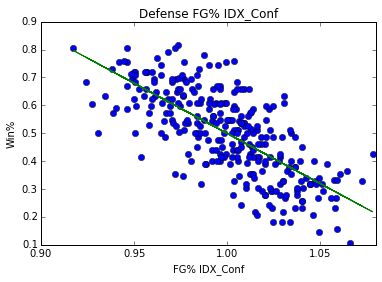

In [22]:
m, b = np.polyfit(def_conf['FG% IDX_Conf'], def_conf['Win%'], 1)

plt.plot(def_conf['FG% IDX_Conf'], def_conf['Win%'], 'o')
plt.plot(def_conf['FG% IDX_Conf'], m * def_conf['FG% IDX_Conf'] + b, '-')
plt.title('Defense FG% IDX_Conf')
plt.xlabel('FG% IDX_Conf')
plt.ylabel('Win%')

'm: ' + str(m) + '; b: ' + str(b)

'm: -3.6673185875; b: 4.16732310421'

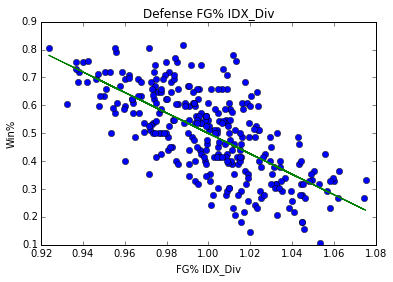

In [23]:
m, b = np.polyfit(def_conf['FG% IDX_Div'], def_conf['Win%'], 1)

plt.plot(def_conf['FG% IDX_Div'], def_conf['Win%'], 'o')
plt.plot(def_conf['FG% IDX_Div'], m * def_conf['FG% IDX_Div'] + b, '-')
plt.title('Defense FG% IDX_Div')
plt.xlabel('FG% IDX_Div')
plt.ylabel('Win%')

'm: ' + str(m) + '; b: ' + str(b)

In [25]:
for y in years:
    print y, type(y)

2005 <type 'int'>
2006 <type 'int'>
2007 <type 'int'>
2008 <type 'int'>
2009 <type 'int'>
2010 <type 'int'>
2011 <type 'int'>
2012 <type 'int'>
2013 <type 'int'>
2014 <type 'int'>


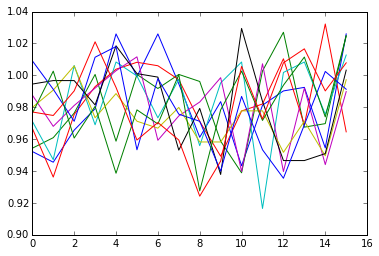

In [27]:
for y in years:
    plt.plot(def_conf[def_conf['Playoffs']=='Y'][def_conf['Year']==y]['FG% IDX_Year'])
    plt.legend

## Next Steps

In [ ]:
# 1. More data:
#     a) take more years into consideration
#     b) use more fields/features, i.e., rebounds, turnovers
#     c) search out other data (schedule)
# 2. Standardize v. Normalizing fields
# 3. Try different models:
#     regression; tree; kNN (?)
